<a href="https://colab.research.google.com/github/gabrielavelasquez88/Aprendizaje_Proyecto/blob/main/AA_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 1. Cargar el dataset
# Assuming the file is directly in your My Drive folder
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parcial/AR_V.csv')


In [4]:
# 2. Seleccionar variables
features = [
    'new_confirmed',
    'new_hospitalized_patients',
    'cumulative_persons_fully_vaccinated',
    'mobility_workplaces',
    'mobility_residential',
    'average_temperature_celsius',
    'population_age_70_79',
    'population_age_80_and_older'
]
target = 'new_intensive_care_patients'

# Nueva sección

In [6]:
# 3. Eliminar filas con valores nulos en esas columnas
df = df[features + [target]].dropna()
df

,new_confirmed,new_hospitalized_patients,cumulative_persons_fully_vaccinated,mobility_workplaces,mobility_residential,average_temperature_celsius,population_age_70_79,population_age_80_and_older,new_intensive_care_patients
363,114.0,1.0,0.0,-13.0,5.0,9.763889,2114,316,1.0
364,116.0,3.0,0.0,-12.0,3.0,9.027778,2114,316,3.0
367,177.0,6.0,0.0,-26.0,6.0,14.958333,2114,316,1.0
369,181.0,0.0,0.0,-14.0,7.0,9.194444,2114,316,1.0
370,132.0,7.0,0.0,-13.0,5.0,12.097222,2114,316,4.0
...,...,...,...,...,...,...,...,...,...
865,0.0,1.0,63604.0,16.0,2.0,4.250000,2114,316,0.0
866,2.0,1.0,63620.0,88.0,-2.0,5.472222,2114,316,2.0
867,5.0,1.0,63640.0,84.0,-6.0,5.972222,2114,316,0.0
868,2.0,0.0,63640.0,-62.0,20.0,6.236111,2114,316,0.0


In [7]:
#df description
df.describe()



,new_confirmed,new_hospitalized_patients,cumulative_persons_fully_vaccinated,mobility_workplaces,mobility_residential,average_temperature_celsius,population_age_70_79,population_age_80_and_older,new_intensive_care_patients
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.0,488.0,488.000000
mean,55.637295,2.272541,31831.235656,26.719262,1.418033,6.993283,2114.0,316.0,0.680328
std,111.818980,2.211020,25890.328133,32.338321,4.824799,3.514454,0.0,0.0,0.982528
min,0.000000,0.000000,0.000000,-62.000000,-10.000000,-2.236111,2114.0,316.0,0.000000
25%,2.000000,1.000000,5094.750000,4.000000,-2.000000,4.583333,2114.0,316.0,0.000000
50%,25.500000,2.000000,36173.000000,26.000000,1.000000,7.111111,2114.0,316.0,0.000000
75%,62.000000,3.000000,60591.750000,50.000000,4.000000,9.506944,2114.0,316.0,1.000000
max,930.000000,13.000000,63656.000000,95.000000,24.000000,15.486111,2114.0,316.0,7.000000


In [8]:
#valores nulos
df.isnull().sum()

,0
new_confirmed,0
new_hospitalized_patients,0
cumulative_persons_fully_vaccinated,0
mobility_workplaces,0
mobility_residential,0
average_temperature_celsius,0
population_age_70_79,0
population_age_80_and_older,0
new_intensive_care_patients,0


MAE: 0.5928310294035306
MSE: 0.6892373201375697
R2 Score: 0.3076628780879387


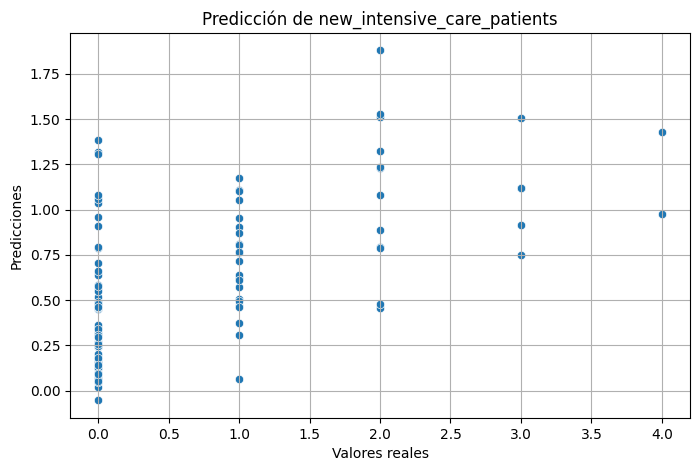

In [5]:
# 4. Dividir en variables independientes y dependientes
X = df[features]
y = df[target]

# 5. Dividir en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Crear y entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predicciones
y_pred = model.predict(X_test)

# 8. Evaluación del modelo
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# 9. Visualización: reales vs predichos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción de new_intensive_care_patients")
plt.grid()
plt.show()
